In [1]:
import pandas as pd
covid_df = pd.read_csv('data\covid_df.csv')

In [6]:
import seaborn as sns
print(sns.__version__)

0.12.1


In [2]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


In [3]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed'] / croped_covid_df['population'] * 100

In [4]:
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-01-23,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.000016,0.000016,0.000019,0.000019,0.000019,0.000035,0.000035,0.000047,0.000047,...,0.116606,0.116621,0.116637,0.116683,0.116722,0.116788,0.116854,0.116897,0.116932,0.116983
Canada,NaN,NaN,0.000003,0.000003,0.000005,0.000005,0.000008,0.000008,0.000011,0.000011,...,3.599497,3.611526,3.620169,3.628017,3.632706,3.642529,3.648718,3.661252,3.669520,3.675536
Germany,NaN,NaN,NaN,NaN,0.000005,0.000005,0.000005,0.000006,0.000010,0.000012,...,4.345962,4.355632,4.363299,4.368845,4.371625,4.374704,4.380047,4.388347,4.395716,4.401106
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,0.000001,0.000001,...,3.368999,3.375035,3.380916,3.386963,3.392637,3.397954,3.403604,3.409708,3.415960,3.422232
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,0.000003,0.000003,...,6.594230,6.598223,6.601946,6.605033,6.608528,6.612093,6.616504,6.621495,6.627439,6.632219


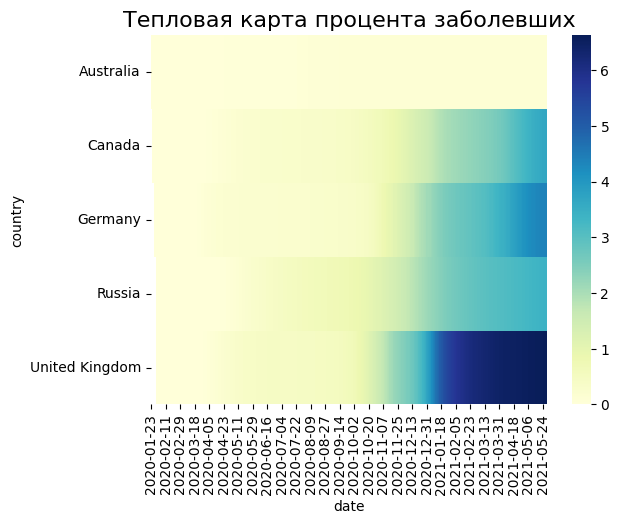

In [7]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта процента заболевших', fontsize=16);

In [8]:
croped_covid_df

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,...,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,death_rate,recover_rate,population,daily_confirmed_per_hundred,confirmed_per_hundred
0,3616,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN,0.000000
1,3617,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000016,0.000016
2,3618,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000000,0.000016
3,3619,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000004,0.000019
4,3620,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25726900,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,82537,2021-05-25,United Kingdom,4483177.0,128001.0,15453.0,4339723.0,2417.0,15.0,8.0,...,34.62,8669.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.855140,0.344689,67802690,0.003565,6.612093
2436,82538,2021-05-26,United Kingdom,4486168.0,128010.0,15477.0,4342681.0,2991.0,9.0,24.0,...,35.25,8731.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.853437,0.344994,67802690,0.004411,6.616504
2437,82539,2021-05-27,United Kingdom,4489552.0,128020.0,15480.0,4346052.0,3384.0,10.0,3.0,...,35.89,8736.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.851509,0.344801,67802690,0.004991,6.621495
2438,82540,2021-05-28,United Kingdom,4493582.0,128030.0,15480.0,4350072.0,4030.0,10.0,0.0,...,36.53,8723.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2.849175,0.344491,67802690,0.005944,6.627439


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

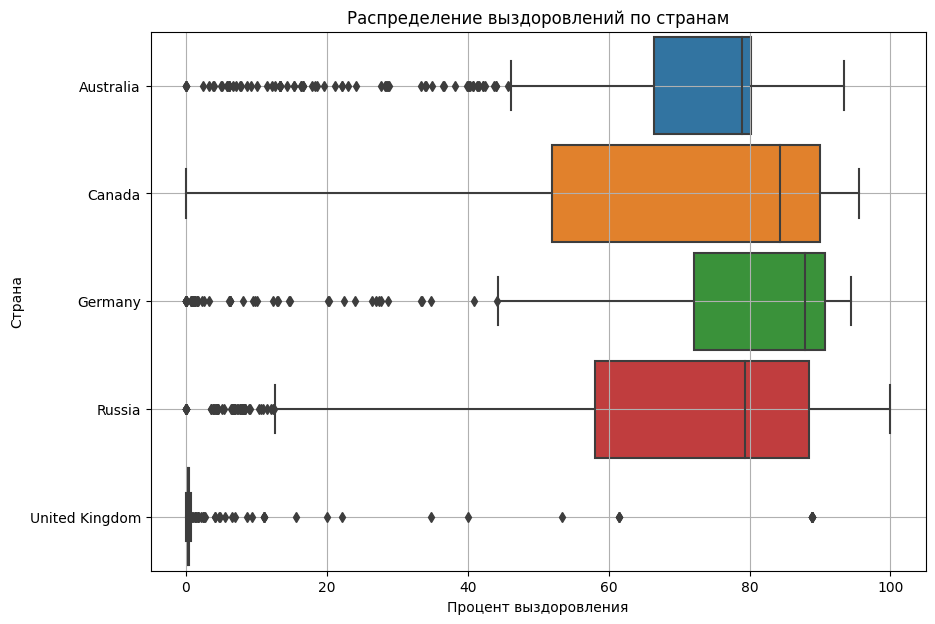

In [11]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоровлений по странам');
boxplot.set_xlabel('Процент выздоровления');
boxplot.set_ylabel('Страна');
boxplot.grid()